## How does the level of filtering affect the timing resolution of our pulses?

We use gaussian filtering, with varying sigma levels, to determine how the level of filtering affects the timing resolution of the CFD method.

In [41]:
from delayfunctions import *

In [42]:
sigmas = []
for i in range(11):
    sigmas.append(i * 2)

In [43]:
sigmas

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [109]:
def sigma_comparisons(path, frac, sigmas):
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    stds = []
    
    for sigma in sigmas:
        data, std = get_timing_delays_trace(path, sigma, frac, False)
        stds.append(std)

    f = csv_files[0]
    
    # read the csv file
    data = pd.read_csv(f, skiprows=1)

    # print the location and filename

    
    fig, ax = plt.subplots(figsize=(8,6))
    p1 = np.array(data['1 (VOLT)'])
    p2 = np.array(data['4 (VOLT)'])


    p1_filter = scipy.ndimage.gaussian_filter(p1, sigma = 0)
    p2_filter = scipy.ndimage.gaussian_filter(p2, sigma = 0)



    time = np.array(data['Time (s)'])

    plt.xlabel("time (s)", fontsize=14)
    plt.ylabel("amplitude (V)", fontsize=14)
    plt.title("Pulse graph, raw and filtered", fontsize=14)
    plt.plot(time, p1,color='plum', label='Channel 1, Raw')
    plt.plot(time, p2,color='cornflowerblue',label='Channel 4, Raw')
    plt.plot(time, p1_filter,color='indigo',linestyle='--', label='Channel 1, Filtered', linewidth=5)
    plt.plot(time, p2_filter,color='royalblue',linestyle='--', label='Channel 4, Filtered',linewidth=5)
    
    return stds

In [110]:
def plot(stds, frac):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.subplots_adjust(hspace=0.05)  
    ax1.scatter(sigmas, stds)
    ax2.scatter(sigmas, stds)

    ax1.set_ylim(max(stds)-1, max(stds) + 1)  # outliers only
    ax2.set_ylim(min(stds)* 0.9, max(stds[1:]) * 1.1)  # most of the data


    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()


    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    plt.xlabel("Sigma",fontsize=14)
    plt.ylabel("STD in ns",fontsize=14)
    ax1.set_title("STD for different sigma values in gaussian filtering. Constant fracion: {}%\n".format(frac * 100))

    plt.show()

## 205 mm delay

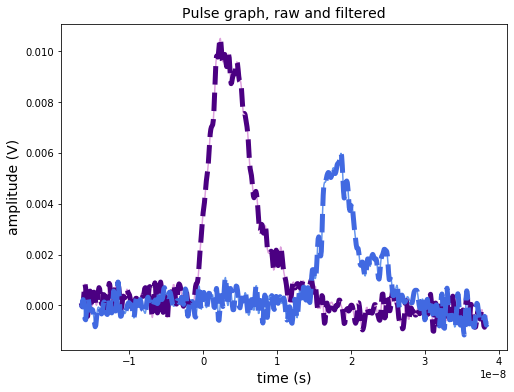

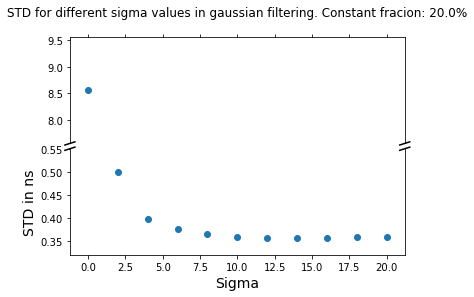

In [111]:
path = 'sensL sipm delays 205 mm/SNSL_sipm_trace_205mm'
plot(np.array(sigma_comparisons(path, 0.2, sigmas)) * 1e9, 0.2)

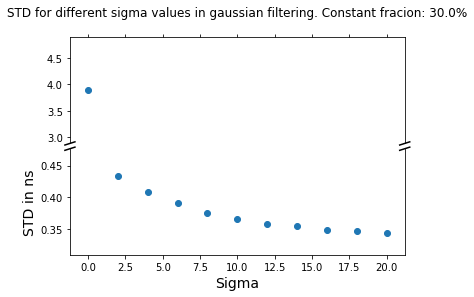

In [101]:
plot(np.array(sigma_comparisons(path, 0.3, sigmas)) * 1e9, 0.3)

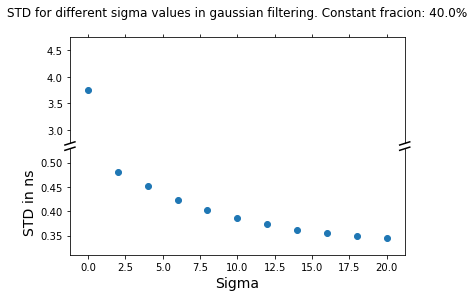

In [102]:
plot(np.array(sigma_comparisons(path, 0.4, sigmas)) * 1e9, 0.4)

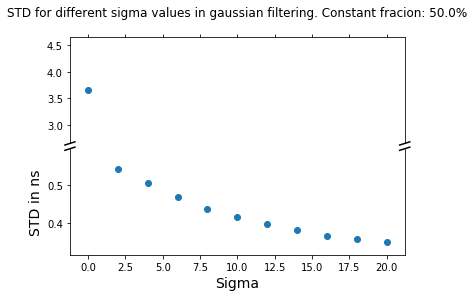

In [103]:
plot(np.array(sigma_comparisons(path, 0.5, sigmas)) * 1e9, 0.5)

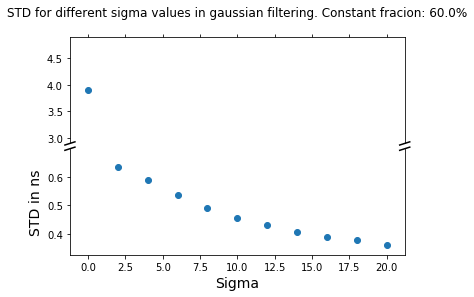

In [104]:
plot(np.array(sigma_comparisons(path, 0.6, sigmas)) * 1e9, 0.6)

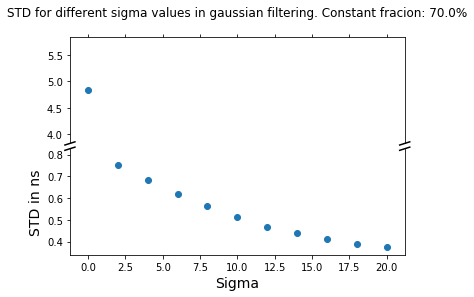

In [105]:
plot(np.array(sigma_comparisons(path, 0.7, sigmas)) * 1e9, 0.7)

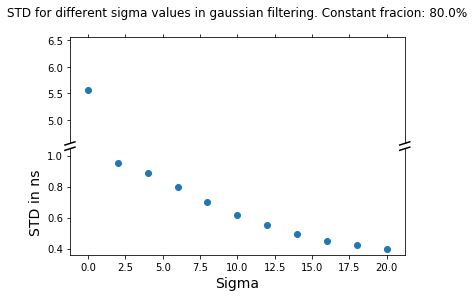

In [106]:
plot(np.array(sigma_comparisons(path, 0.8, sigmas)) * 1e9, 0.8)

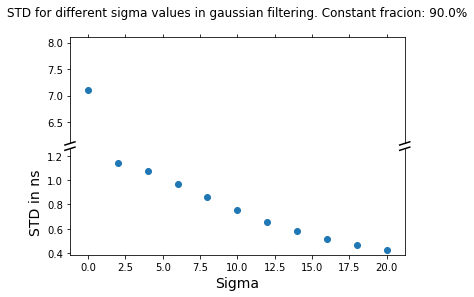

In [107]:
plot(np.array(sigma_comparisons(path, 0.9, sigmas)) * 1e9, 0.9)

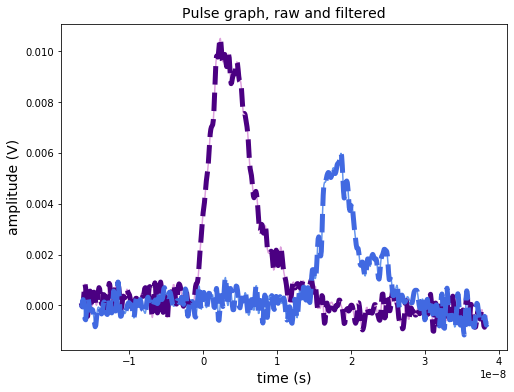

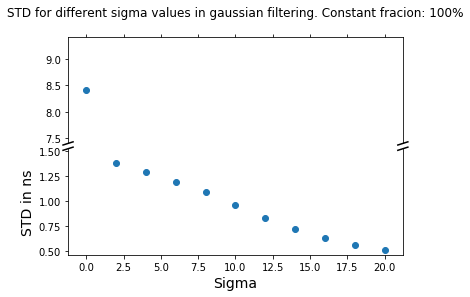

In [112]:
plot(np.array(sigma_comparisons(path, 0.999999, sigmas)) * 1e9, 1)

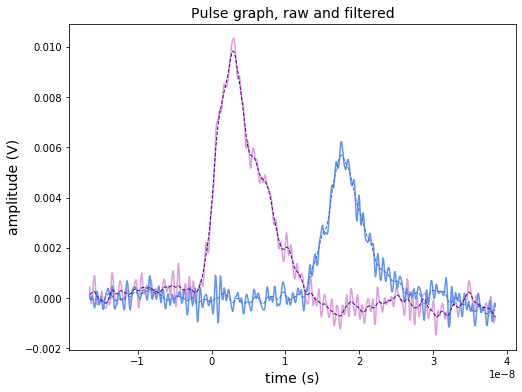

In [118]:
csv_files = glob.glob(os.path.join(path, "*.csv"))

stds = []
f = csv_files[4]

# read the csv file
data = pd.read_csv(f, skiprows=1)

# print the location and filename


fig, ax = plt.subplots(figsize=(8,6))
p1 = np.array(data['1 (VOLT)'])
p2 = np.array(data['4 (VOLT)'])


p1_filter = scipy.ndimage.gaussian_filter(p1, sigma = 4)
p2_filter = scipy.ndimage.gaussian_filter(p2, sigma = 4)



time = np.array(data['Time (s)'])

plt.xlabel("time (s)", fontsize=14)
plt.ylabel("amplitude (V)", fontsize=14)
plt.title("Pulse graph, raw and filtered", fontsize=14)
plt.plot(time, p1,color='plum', label='Channel 1, Raw')
plt.plot(time, p2,color='cornflowerblue',label='Channel 4, Raw')
plt.plot(time, p1_filter,color='indigo',linestyle='--', label='Channel 1, Filtered', linewidth=1)
plt.plot(time, p2_filter,color='royalblue',linestyle='--', label='Channel 4, Filtered',linewidth=1)
